In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn import impute
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [26]:
# Label Encoding
data = pd.read_csv("bank-additional-full.csv", sep=';')
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
categorical_columns = data.drop('y', axis=1).select_dtypes(include=['object']).columns

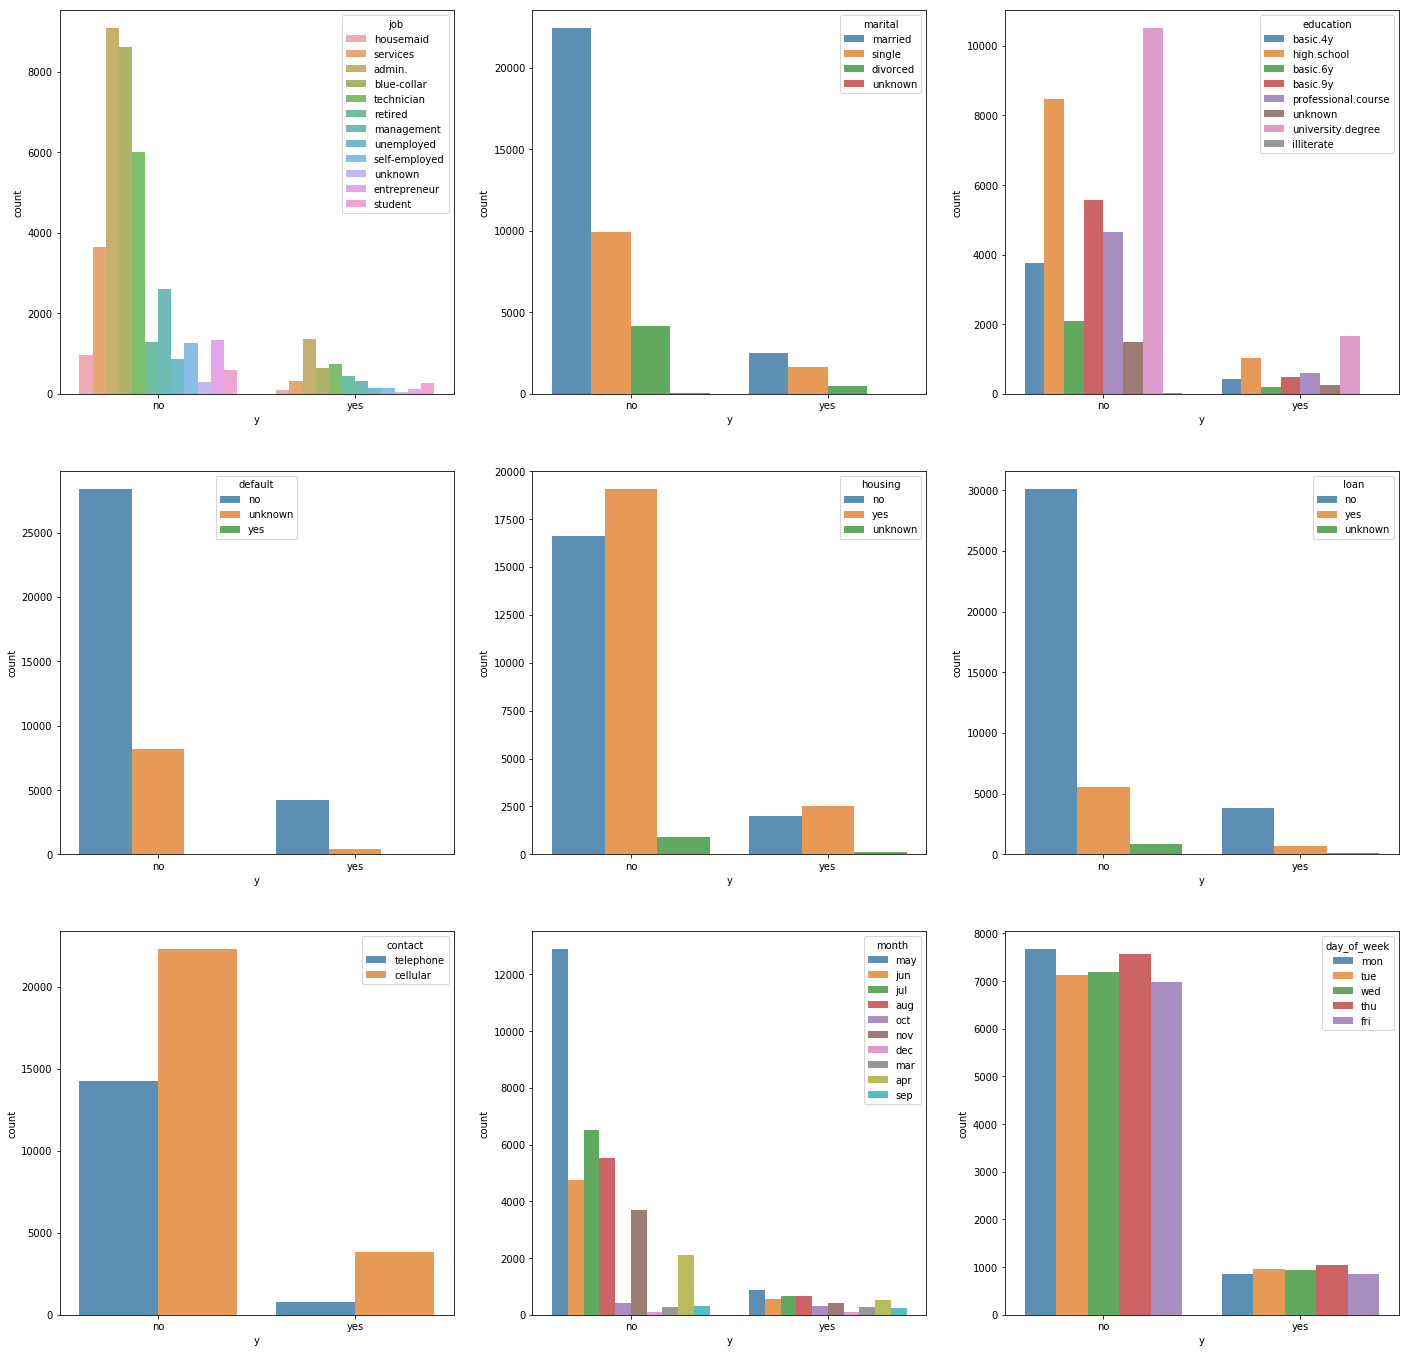

In [4]:
new_cat_list = []
for idx in range(4):
    new_cat_list.append(categorical_columns[3*idx: 3*idx+3])

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,24))
for i in range(3):
    for j in range(3):
        sns.countplot(x='y', hue=new_cat_list[i][j], data=data, ax=axs[i,j], alpha=.8)
plt.show()

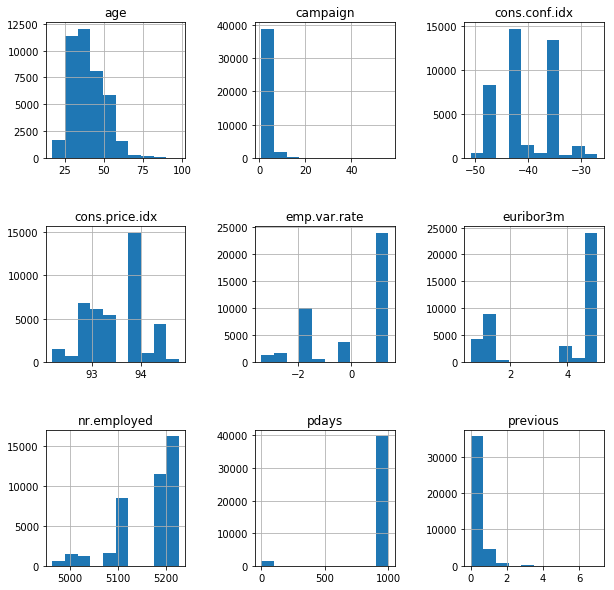

In [5]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [28]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [29]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


In [30]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [31]:
num_feat = data.drop('y', axis=1).select_dtypes(include=np.number).columns
cat_feat = data.drop('y', axis=1).select_dtypes(include=['object']).columns
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
for col in data.columns:
    if data[col].nunique() < 20:
        print('=======================================')
        print(col)
        print('---------------------------------------')
        print(round(1e2*data[col].value_counts()/len(data),2))


job
---------------------------------------
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64
marital
---------------------------------------
married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64
education
---------------------------------------
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64
default
---------------------------------------
no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64
housing
---------------------------------------
yes        52

In [33]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,1


In [34]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [35]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [36]:
#Label Encoding
#data balancing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [38]:
# raw data
#data = pd.read_csv("bank-additional-full.csv", sep=';')
#data = data.drop('duration',axis=1)
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
X = data.drop('y', axis=1).values
y = data['y'].values

In [39]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [23]:

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision')

In [24]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'kernel': 'linear'}
This model produces a mean cross-validated score (precision) of 0.6468751668783775
